In [2]:
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import time

In [ ]:
np.random.seed(0)
X = np.random.uniform(0. , 100., [70000,2])
Y = np.zeros([70000, 1])
for row in range(70000):
    if 10<=X[row][0] <= 50. and 10<=X[row][1] <= 50.:
        Y[row] = 1
        
X_train = X[:60000]
X_test = X[60000:]
Y_train = Y[:60000]
Y_test = Y[60000:]
print(X[200:220])
print(Y[200:220])

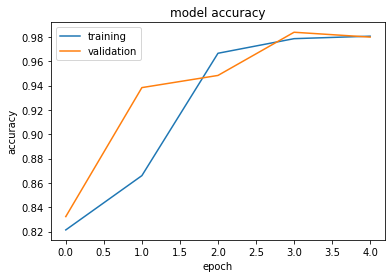

Accuracy: 98.23


In [70]:
# set and train the NN model 
model = Sequential()

model.add(Dense(units=32, activation="relu", input_dim=2))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# plot the losses
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history=model.fit(X_train, Y_train, batch_size=50,epochs=5, verbose=0, validation_split=.1)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
print('Accuracy: %.2f' % (accuracy*100))

In [63]:
test = np.random.uniform(0. , 100., [7,2])
predictions = model.predict(test)
print(test)
print(predictions)

[[ 7.75974477 79.6110911 ]
 [48.53481579 83.48183753]
 [52.3450622  28.310392  ]
 [40.5462916  73.12657739]
 [39.02769445 49.80137262]
 [12.50156043 42.46682073]
 [ 1.55420275 67.11297526]]
[[6.2156069e-10 1.0000000e+00]
 [1.4622390e-07 9.9999988e-01]
 [3.0591184e-01 6.9408816e-01]
 [3.0342026e-05 9.9996960e-01]
 [7.7182782e-01 2.2817224e-01]
 [9.6021104e-01 3.9788950e-02]
 [2.5513296e-12 1.0000000e+00]]


In [71]:
# save model
model.save("model_3.h5")

In [4]:
# load the model 
model_3 = keras.models.load_model("model_3.h5")

In [78]:
%run simple_interval_propagation.ipynb
input_min = np.array([20., 20.])
input_max = np.array([21., 21.])
oumin, oumax=simple_interval_propagation_model(model_3, input_min, input_max)
print(oumin)
print(oumax)

[[0.58945627]]
[[0.99980635]]
